In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
#from api_key import eia_api_key
eia_api_key = "7GAy2uMZHd2UXwGYyaoKyDeWSKxo9Mqvg7ehleq5"

In [2]:
# API CALLS
capacity_api_call_2008 = requests.get(f'https://api.eia.gov/v2/electricity/state-electricity-profiles/capability/data/?api_key={eia_api_key}&frequency=annual&data[0]=capability&facets[producertypeid][]=TOT&start=2008&end=2008&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=24000').json()

capacity_api_call_2018 = requests.get(f'https://api.eia.gov/v2/electricity/state-electricity-profiles/capability/data/?api_key={eia_api_key}&frequency=annual&data[0]=capability&facets[producertypeid][]=TOT&start=2018&end=2018&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=24000').json()

key_stats_api_call = requests.get(f'https://api.eia.gov/v2/electricity/state-electricity-profiles/summary/data/?api_key={eia_api_key}&frequency=annual&data[0]=average-retail-price&data[1]=average-retail-price-rank&data[2]=capacity-elec-utilities&data[3]=capacity-elect-utilities-rank&data[4]=capacity-ipp&data[5]=capacity-ipp-rank&data[6]=carbon-dioxide&data[7]=carbon-dioxide-lbs&data[8]=carbon-dioxide-rank&data[9]=carbon-dioxide-rank-lbs&data[10]=direct-use&data[11]=direct-use-rank&data[12]=eop-sales&data[13]=eop-sales-rank&data[14]=fsp-sales-rank&data[15]=fsp-service-provider-sales&data[16]=generation-elect-utils&data[17]=generation-elect-utils-rank&data[18]=generation-ipp&data[19]=generation-ipp-rank&data[20]=net-generation&data[21]=net-generation-rank&data[22]=net-summer-capacity&data[23]=net-summer-capacity-rank&data[24]=nitrogen-oxide&data[25]=nitrogen-oxide-lbs&data[26]=nitrogen-oxide-rank&data[27]=nitrogen-oxide-rank-lbs&data[28]=prime-source&data[29]=sulfer-dioxide&data[30]=sulfer-dioxide-lbs&data[31]=sulfer-dioxide-rank&data[32]=sulfer-dioxide-rank-lbs&data[33]=total-retail-sales&data[34]=total-retail-sales-rank&start=2008&end=2018&sort[0][column]=average-retail-price&sort[0][direction]=asc&offset=0&length=24000').json()


In [3]:
# FOR LOOP TO PULL COLUMNS FROM API FOR KEY STATS
state_key_stats = []

for x in key_stats_api_call['response']['data']:
    key_stats_energy_source = x['prime-source']
    key_stats_state = x['stateDescription']
    key_stats_period = x['period']
    key_stats_avg_price = x['average-retail-price']
    key_stats_carbon_per_mw = x['carbon-dioxide-lbs']
    key_stats_total_carbon = x['carbon-dioxide']
    
    
    state_key_stats.append({"State": key_stats_state,
                            'Year': key_stats_period,
                            'Energy Source': key_stats_energy_source,
                            'Average Price (Cents per KW Hour)': key_stats_avg_price,
                            'CO2 Emissions (lbs per MW Hour)': key_stats_carbon_per_mw,
                            'Total CO2 Emissions (thousand metric tons)': key_stats_total_carbon
        })



In [78]:
# MAKE KEY STATS A DF
df_state_key_stats = pd.DataFrame(state_key_stats)

df_state_key_stats.head()

,State,Year,Energy Source,Average Price (Cents per KW Hour),CO2 Emissions (lbs per MW Hour),Total CO2 Emissions (thousand metric tons)
0,West Virginia,2008,Coal,5.61,2043,84610
1,Wyoming,2008,Coal,5.67,2216,46837
2,Idaho,2008,Hydroelectric,5.69,187,1017
3,Wyoming,2009,Coal,6.08,2136,44684
4,Wyoming,2010,Coal,6.20,2090,45703


In [5]:
# REMOVE D.C FROM STATES
df_clean_state_key_stats = df_state_key_stats.drop(df_state_key_stats[df_state_key_stats['State'].str.contains('District of Columbia') | df_state_key_stats['State'].str.contains('United States')].index,inplace=False)
df_clean_state_key_stats

,State,Year,Energy Source,Average Price (Cents per KW Hour),CO2 Emissions (lbs per MW Hour),Total CO2 Emissions (thousand metric tons)
0,West Virginia,2008,Coal,5.61,2043,84610
1,Wyoming,2008,Coal,5.67,2216,46837
2,Idaho,2008,Hydroelectric,5.69,187,1017
3,Wyoming,2009,Coal,6.08,2136,44684
4,Wyoming,2010,Coal,6.20,2090,45703
...,...,...,...,...,...,...
567,Hawaii,2008,Petroleum,29.20,1750,9048
568,Hawaii,2011,Petroleum,31.59,1662,8100
569,Hawaii,2013,Petroleum,33.26,1592,7428
570,Hawaii,2014,Petroleum,33.43,1606,7448


In [6]:
# SEPARATE KEY STATE STATS BY RELEVANT YEAR
df_2008_state_key_stats = df_clean_state_key_stats.loc[df_clean_state_key_stats['Year'] == 2008]
df_2018_state_key_stats = df_clean_state_key_stats.loc[df_clean_state_key_stats['Year'] == 2018]


df_2008_state_key_stats.reset_index(drop=True, inplace=True)
df_2018_state_key_stats.reset_index(drop=True, inplace=True)


In [77]:
# FIND STATISTIC VALUES FOR AVERAGE PRICE FOR EACH RELEVANT YEAR

df_2008_max_average_price = df_2008_state_key_stats.loc[(df_2008_state_key_stats['Average Price (Cents per KW Hour)'].idxmax())]
max_average_price_2008 = df_2008_max_average_price['State']
print(f'2008 max average price: {max_average_price_2008}')
df_2018_max_average_price = df_2018_state_key_stats.loc[(df_2018_state_key_stats['Average Price (Cents per KW Hour)'].idxmax())]
max_average_price_2018 = df_2018_max_average_price['State']
print(f'2018 max average price: {max_average_price_2018}')

df_2008_min_average_price = df_2008_state_key_stats.loc[(df_2008_state_key_stats['Average Price (Cents per KW Hour)'].idxmin())]
min_average_price_2008 = df_2008_min_average_price['State']
print(f'2008 min average price: {min_average_price_2008}')
df_2018_min_average_price = df_2018_state_key_stats.loc[(df_2018_state_key_stats['Average Price (Cents per KW Hour)'].idxmin())]
min_average_price_2018 = df_2018_min_average_price['State']
print(f'2018 min average price: {min_average_price_2018}')

#print(df_2008_state_key_stats['Average Price (Cents per KW Hour)'].median())
df_2008_median_average_price = df_2008_state_key_stats.loc[24:25, :]
median_average_price_2008 = df_2008_median_average_price['State']
print(f'2008 median average price:') 
print(f'{median_average_price_2008}')

# #print(df_2018_state_key_stats['Average Price (Cents per KW Hour)'].median())
df_2018_median_average_price = df_2018_state_key_stats.loc[24:25, :]
median_average_price_2018 = df_2018_median_average_price['State']
print(f'2018 median average price:') 
print(f'{median_average_price_2018}')


# print(df_2008_state_key_stats['Average Price (Cents per KW Hour)'].mean())
df_2008_mean_average_price = df_2008_state_key_stats.loc[34, :]
mean_average_price_2008 = df_2008_mean_average_price['State']
print(f'2008 mean average price: {mean_average_price_2008}')
# #print(df_2018_state_key_stats['Average Price (Cents per KW Hour)'].mean())
df_2018_mean_average_price = df_2018_state_key_stats.loc[37, :]
mean_average_price_2018 = df_2018_mean_average_price['State']
print(f'2018 mean average price: {mean_average_price_2018}')

2008 max average price: Hawaii
2018 max average price: Hawaii
2008 min average price: West Virginia
2018 min average price: Louisiana
2008 median average price:
24    Colorado
25     Alabama
Name: State, dtype: object
2018 median average price:
24    South Carolina
25           Indiana
Name: State, dtype: object
2008 mean average price: Nevada
2018 mean average price: Michigan


In [76]:
# FIND STATISTIC VALUES FOR CO2 EMISSIONS BY POUNDS PER MEGAWAT HOUR FOR EACH RELEVANT YEAR

df_2008_max_co2_emissions = df_2008_state_key_stats.loc[(df_2008_state_key_stats['CO2 Emissions (lbs per MW Hour)'].idxmax())]
max_co2_emissions_2008 = df_2008_max_co2_emissions['State']
print(f'2008 max c02 emissions: {max_co2_emissions_2008}')
df_2018_max_co2_emissions = df_2018_state_key_stats.loc[(df_2018_state_key_stats['CO2 Emissions (lbs per MW Hour)'].idxmax())]
max_co2_emissions_2018 = df_2018_max_co2_emissions['State']
print(f'2018 max c02 emissions: {max_co2_emissions_2018}')

df_2008_min_co2_emissions = df_2008_state_key_stats.loc[(df_2008_state_key_stats['CO2 Emissions (lbs per MW Hour)'].idxmin())]
min_co2_emissions_2008 = df_2008_min_co2_emissions['State']
print(f'2008 min c02 emissions: {min_co2_emissions_2008}')
df_2018_min_co2_emissions = df_2018_state_key_stats.loc[(df_2018_state_key_stats['CO2 Emissions (lbs per MW Hour)'].idxmin())]
min_co2_emissions_2018 = df_2018_min_co2_emissions['State']
print(f'2018 min c02 emissions: {min_co2_emissions_2018}')

#print(df_2008_state_key_stats['CO2 Emissions (lbs per MW Hour)'].median())
df_2008_median_co2_emissions = df_2008_state_key_stats.loc[[19, 40], 'State']
print(f'2008 median c02 emissions:') 
print(f'{df_2008_median_co2_emissions}')

#print(df_2018_state_key_stats['CO2 Emissions (lbs per MW Hour)'].median())
df_2018_median_co2_emissions = df_2018_state_key_stats.loc[[36, 22], :]
median_co2_emissions_2018 = pd.DataFrame(df_2018_median_co2_emissions['State'])
print(f'2018 median c02 emissions:') 
print(f'{median_co2_emissions_2018}')

#print(df_2008_state_key_stats['CO2 Emissions (lbs per MW Hour)'].mean())
df_2008_mean_co2_emissions = df_2008_state_key_stats.loc[19, :]
mean_co2_emissions_2008 = df_2008_mean_co2_emissions['State']
print(f'2008 mean c02 emissions: {mean_co2_emissions_2008}')
#print(df_2018_state_key_stats['CO2 Emissions (lbs per MW Hour)'].mean())
df_2018_mean_co2_emissions = df_2018_state_key_stats.loc[35, :]
mean_co2_emissions_2018 = df_2018_mean_co2_emissions['State']
print(f'2008 mean c02 emissions: {mean_co2_emissions_2008}')

2008 max c02 emissions: Wyoming
2018 max c02 emissions: Wyoming
2008 min c02 emissions: Vermont
2018 min c02 emissions: Vermont
2008 median c02 emissions:
19    North Carolina
40          Maryland
Name: State, dtype: object
2018 median c02 emissions:
      State
36  Arizona
22  Georgia
2008 mean c02 emissions: North Carolina
2008 mean c02 emissions: North Carolina


In [9]:
# key_stats_combined = {'Max Average Price': (max_average_price_2008, max_average_price_2018),
#                       'Min Average Price': (min_average_price_2008, min_average_price_2018),
#                       'Median Average Price': (median_average_price_2008, median_average_price_2018),
#                       'Mean Average Price': (mean_average_price_2008, mean_average_price_2018),
#                       'Max CO2 Emissions': (max_co2_emissions_2008, max_co2_emissions_2018), 
#                       'Min CO2 Emissions': (min_co2_emissions_2008, min_co2_emissions_2018), 
#                       'Median CO2 Emissions': (median_co2_emissions_2008, median_co2_emissions_2018),
#                       'Mean CO2 Emissions': (mean_co2_emissions_2008, mean_co2_emissions_2018)}

# df_key_stats_combined = pd.DataFrame(key_stats_combined, index=[2008, 2018])
# df_key_stats_combined.head(5)

In [10]:
# COMBINE RELEVANT YEARS CLEAN KEY STATE STATS

df_combined_state_key_stats = df_2008_state_key_stats.merge(df_2018_state_key_stats, how='outer')

df_combined_state_key_stats.head(100)


,State,Year,Energy Source,Average Price (Cents per KW Hour),CO2 Emissions (lbs per MW Hour),Total CO2 Emissions (thousand metric tons)
0,West Virginia,2008,Coal,5.61,2043,84610
1,Wyoming,2008,Coal,5.67,2216,46837
2,Idaho,2008,Hydroelectric,5.69,187,1017
3,Kentucky,2008,Coal,6.26,2114,94028
4,Utah,2008,Coal,6.49,1860,39381
...,...,...,...,...,...,...
95,Rhode Island,2018,Natural Gas,18.10,879,3348
96,Connecticut,2018,Natural Gas,18.41,535,9591
97,Massachusetts,2018,Natural Gas,18.50,808,9976
98,Alaska,2018,Natural Gas,19.36,1194,3390


In [11]:
# GET DELTA VALUES BY STATE BY YEAR TO MAKE PERCENT CHANGE GRAPH

#df_combined_state_key_stats.loc[df_combined_state_key_stats(df_combined_state_key_stats['State'] == df_combined_state_key_stats['State'] & df_combined_state_key_stats['Year']==2018) - ((df_combined_state_key_stats['State'] == df_combined_state_key_stats['State']) & (df_combined_state_key_stats['Year']==2008))]
# try a loop for this
df_grouped_key_stats = df_combined_state_key_stats.groupby(['State', 'Year']).mean()
df_grouped_key_stats.head(50)
df_price_delta_key_stats = df_grouped_key_stats['Average Price (Cents per KW Hour)'].pct_change()
df_price_delta_key_stats = df_price_delta_key_stats.to_frame()
df_price_delta_key_stats
# df_price_delta_key_stats = df_price_delta_key_stats.sort_values(by='Average Price (Cents per KW Hour)')
# display(df_price_delta_key_stats)
# df_grouped_key_stats = df_combined_state_key_stats.pivot_table(index='Year', columns='State', values='Average Price (Cents per KW Hour)')
# print(df_grouped_key_stats)
# df_price_delta_key_stats = df_grouped_key_stats.pct_change()
# df_price_delta_key_stats = df_price_delta_key_stats.transpose().reset_index()

# df_price_delta_key_stats
#df_price_delta_key_stats.index()
#df_price_delta_key_stats = df_price_delta_key_stats.sort_values(by=['2018'], ascending=False)

#df_price_delta_key_stats.sort_values(by='2018')

Average Price (Cents per KW Hour)
State         Year                                   
Alabama       2008                                NaN
              2018                           0.121071
Alaska        2008                           0.530633
              2018                           0.313433
Arizona       2008                          -0.529442
...                                               ...
West Virginia 2018                           0.554367
Wisconsin     2008                           0.032110
              2018                           0.175556
Wyoming       2008                          -0.464083
              2018                           0.426808

[100 rows x 1 columns]

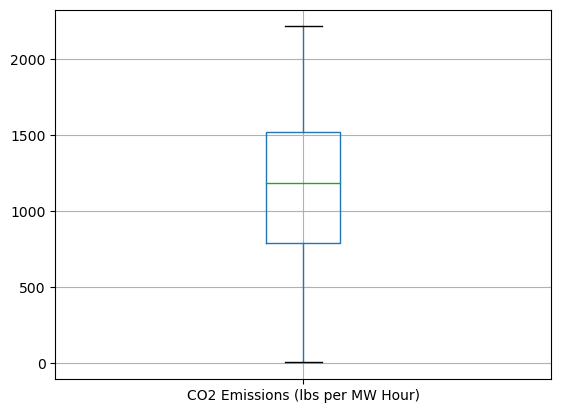

In [12]:
# COMBINED YEARS CO2 EMISSIONS BOX PLOT

df_combined_state_key_stats.boxplot(column=['CO2 Emissions (lbs per MW Hour)'])
plt.show()

In [13]:
# FIND POTENTIAL OUTLIERS FOR CO2 EMISSIONS

co2_quartiles = df_combined_state_key_stats['CO2 Emissions (lbs per MW Hour)'].quantile([.25,.5,.75])
co2_lowerq = co2_quartiles[0.25]
co2_upperq = co2_quartiles[0.75]
co2_iqr = co2_upperq-co2_lowerq
co2_lower_bound = co2_lowerq - (1.5*co2_iqr)
co2_upper_bound = co2_upperq + (1.5*co2_iqr)

print(f"The combined year median of Average Price (Cents per KW Hour) is: {co2_quartiles[0.5]}")
print(f"Values below {co2_lower_bound} could be outliers.")
print(f"Values above {co2_upper_bound} could be outliers.")


The combined year median of Average Price (Cents per KW Hour) is: 1186.0
Values below -308.0 could be outliers.
Values above 2618.0 could be outliers.


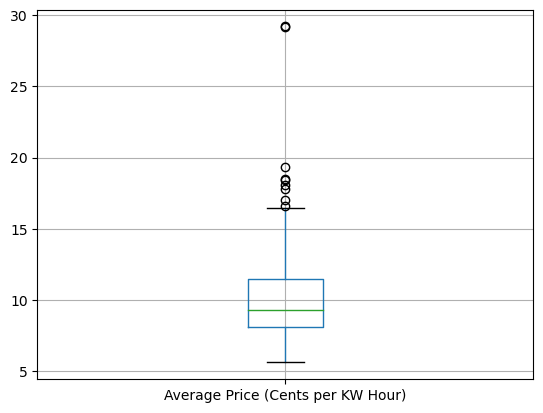

In [14]:
# COMBINED YEARS AVERAGE PRICE BOX PLOT


df_combined_state_key_stats.boxplot(column=['Average Price (Cents per KW Hour)'])
plt.show()

In [15]:
# FIND POTENTIAL OUTLIERS FOR AVERAGE PRICE

price_quartiles = df_combined_state_key_stats['Average Price (Cents per KW Hour)'].quantile([.25,.5,.75])
price_lowerq = price_quartiles[0.25]
price_upperq = price_quartiles[0.75]
price_iqr = price_upperq-price_lowerq
price_lower_bound = price_lowerq - (1.5*price_iqr)
price_upper_bound = price_upperq + (1.5*price_iqr)

print(f"The combined year median of Average Price (Cents per KW Hour) is: {price_quartiles[0.5]}")
print(f"Values below {price_lower_bound} could be outliers.")
print(f"Values above {price_upper_bound} could be outliers.")

The combined year median of Average Price (Cents per KW Hour) is: 9.29
Values below 3.0612499999999985 could be outliers.
Values above 16.47125 could be outliers.


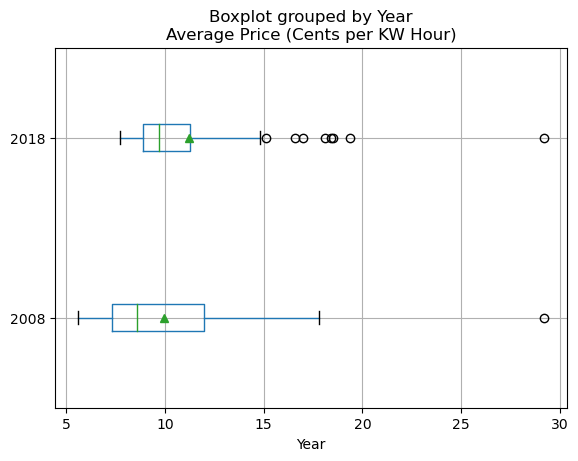

In [16]:
# BOX PLOTS FOR AVERAGE PRICE BY YEAR

df_combined_state_key_stats.boxplot(column=['Average Price (Cents per KW Hour)'], by='Year', showmeans = True, vert=False)

plt.show()

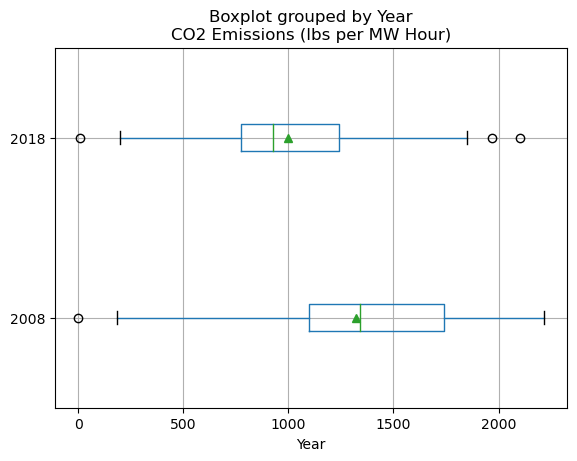

In [17]:
# BOX PLOTS FOR CO2 EMISSIONS BY YEAR

df_combined_state_key_stats.boxplot(column=['CO2 Emissions (lbs per MW Hour)'], by='Year', showmeans = True, vert=False)
plt.show()

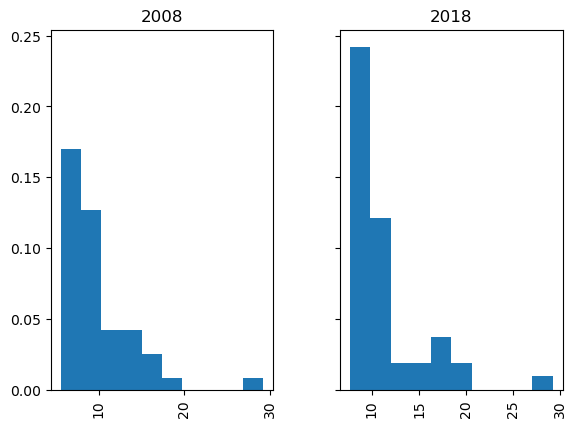

In [18]:
# HISTOGRAM TO COMPARE AVERAGE PRICE BY YEAR

df_combined_state_key_stats.hist(column=['Average Price (Cents per KW Hour)'], by='Year', density=True, sharey=True)
plt.show()

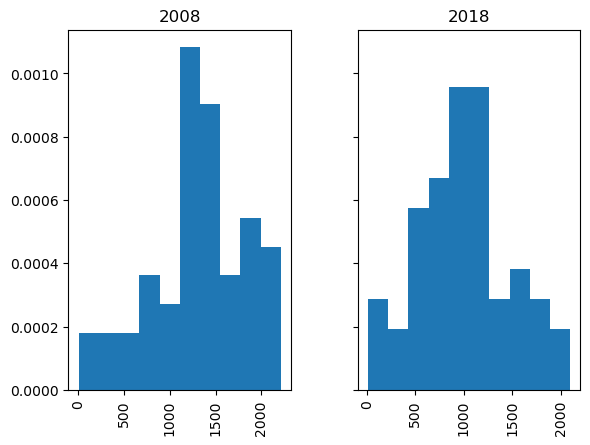

In [79]:
# HISTOGRAM TO COMPARE CO2 EMISSIONS BY YEAR

df_combined_state_key_stats.hist(column=['CO2 Emissions (lbs per MW Hour)'], by='Year', density=True, sharey=True)
plt.show()

In [19]:
# SORT CO2 EMISSIONS IN 2008

df_2008_state_key_stats.sort_values(by='CO2 Emissions (lbs per MW Hour)')

,State,Year,Energy Source,Average Price (Cents per KW Hour),CO2 Emissions (lbs per MW Hour),Total CO2 Emissions (thousand metric tons)
37,Vermont,2008,Nuclear,12.33,2,7
2,Idaho,2008,Hydroelectric,5.69,187,1017
5,Washington,2008,Hydroelectric,6.55,272,13686
12,Oregon,2008,Hydroelectric,7.24,405,10821
43,New Hampshire,2008,Nuclear,14.63,652,6782
39,California,2008,Natural Gas,12.49,662,62549
48,Connecticut,2008,Nuclear,17.80,684,9451
41,Maine,2008,Natural Gas,13.80,684,5314
42,New Jersey,2008,Nuclear,14.43,694,20097
47,New York,2008,Natural Gas,16.47,739,47157


In [20]:
# SORT AVERAGE PRICE IN 2008

df_2008_state_key_stats.sort_values(by='Average Price (Cents per KW Hour)')

,State,Year,Energy Source,Average Price (Cents per KW Hour),CO2 Emissions (lbs per MW Hour),Total CO2 Emissions (thousand metric tons)
0,West Virginia,2008,Coal,5.61,2043,84610
1,Wyoming,2008,Coal,5.67,2216,46837
2,Idaho,2008,Hydroelectric,5.69,187,1017
3,Kentucky,2008,Coal,6.26,2114,94028
4,Utah,2008,Coal,6.49,1860,39381
5,Washington,2008,Hydroelectric,6.55,272,13686
6,Nebraska,2008,Coal,6.58,1526,22460
7,North Dakota,2008,Coal,6.69,2210,32887
8,Missouri,2008,Coal,6.84,1877,77650
9,Iowa,2008,Coal,6.89,1912,46137


In [21]:
# SORT AVERAGE PRICE IN 2018

df_2018_state_key_stats.sort_values(by='Average Price (Cents per KW Hour)')

,State,Year,Energy Source,Average Price (Cents per KW Hour),CO2 Emissions (lbs per MW Hour),Total CO2 Emissions (thousand metric tons)
0,Louisiana,2018,Natural Gas,7.71,1094,50770
1,Arkansas,2018,Coal,7.78,1241,38349
2,Washington,2018,Hydroelectric,8.00,201,10661
3,Wyoming,2018,Coal,8.09,2100,44014
4,Oklahoma,2018,Natural Gas,8.09,880,34476
5,Idaho,2018,Hydroelectric,8.17,214,1766
6,Utah,2018,Coal,8.21,1595,28544
7,Texas,2018,Natural Gas,8.48,1060,230076
8,Kentucky,2018,Coal,8.52,1850,66267
9,Nevada,2018,Natural Gas,8.67,777,14005


In [22]:
# SORT CO2 EMISSIONS IN 2018

df_2018_state_key_stats.sort_values(by='CO2 Emissions (lbs per MW Hour)')

,State,Year,Energy Source,Average Price (Cents per KW Hour),CO2 Emissions (lbs per MW Hour),Total CO2 Emissions (thousand metric tons)
42,Vermont,2018,Hydroelectric,15.13,10,10
2,Washington,2018,Hydroelectric,8.00,201,10661
5,Idaho,2018,Hydroelectric,8.17,214,1766
44,New Hampshire,2018,Nuclear,17.01,282,2191
12,Oregon,2018,Hydroelectric,8.85,302,8800
40,Maine,2018,Hydroelectric,13.44,429,2202
41,New York,2018,Natural Gas,14.83,464,27936
43,California,2018,Natural Gas,16.58,491,43579
28,South Dakota,2018,Hydroelectric,9.97,509,2921
46,Connecticut,2018,Natural Gas,18.41,535,9591


In [23]:
# CHECK TO MAKE SURE DATA IS EQUAL ACROSS STATES

display(df_state_key_stats.groupby('State').count())

,Year,Energy Source,Average Price (Cents per KW Hour),CO2 Emissions (lbs per MW Hour),Total CO2 Emissions (thousand metric tons)
State,,,,,
Alabama,11,11,11,11,11
Alaska,11,11,11,11,11
Arizona,11,11,11,11,11
Arkansas,11,11,11,11,11
California,11,11,11,11,11
Colorado,11,11,11,11,11
Connecticut,11,11,11,11,11
Delaware,11,11,11,11,11
District of Columbia,11,11,11,11,11


In [24]:
# LOOP TO CALL ENERGY PRODUCTION CAPABILITY DATA FROM API

state_production_capability_2008 = []

for x in capacity_api_call_2008['response']['data']:
    production_capability = x['capability']
    state = x['stateDescription']
    period = x['period']
    energy_source = x['energySourceDescription']
    producer_type = x['producerTypeDescription']
    
    state_production_capability_2008.append({"Production Capability (MW)": production_capability,
                                        'State': state,
                                        'Year': period,
                                        'Energy Source': energy_source,
                                        'Producer Type': producer_type
        })

state_production_capability_2018 = []
    
for x in capacity_api_call_2018['response']['data']:
    production_capability = x['capability']
    state = x['stateDescription']
    period = x['period']
    energy_source = x['energySourceDescription']
    producer_type = x['producerTypeDescription']
    
    state_production_capability_2018.append({"Production Capability (MW)": production_capability,
                                        'State': state,
                                        'Year': period,
                                        'Energy Source': energy_source,
                                        'Producer Type': producer_type
        })

In [25]:
# CREATE DF FROM PULLED API DATA FOR 2008

df_state_production_capability_2008 = pd.DataFrame(state_production_capability_2008)

#df_state_production_capability = df_state_production_capability.loc[df_state_production_capability['Year']==2012]
df_state_production_capability_2008

,Production Capability (MW),State,Year,Energy Source,Producer Type
0,3350.8,Delaware,2008,All,All sectors
1,1083.0,Delaware,2008,Coal,All sectors
2,1397.0,Delaware,2008,Natural Gas,All sectors
3,1090.0,Delaware,2008,Natural Gas - CC,All sectors
4,171.0,Delaware,2008,Natural Gas - GT,All sectors
...,...,...,...,...,...
759,1309.4,New Jersey,2008,Petroleum - GT,All sectors
760,14.0,New Jersey,2008,Petroleum - IC,All sectors
761,190.8,New Jersey,2008,Petroleum - ST,All sectors
762,400.0,New Jersey,2008,Pumped Storage,All sectors


In [26]:
# CREATE DF FROM PULLED API DATA FOR 2018

df_state_production_capability_2018 = pd.DataFrame(state_production_capability_2018)
df_state_production_capability_2018

,Production Capability (MW),State,Year,Energy Source,Producer Type
0,18842.2,Iowa,2018,All,All sectors
1,1.1,Iowa,2018,Battery,All sectors
2,5371.7,Iowa,2018,Coal,All sectors
3,146.4,Iowa,2018,Hydroelectric,All sectors
4,3580.7,Iowa,2018,Natural Gas,All sectors
...,...,...,...,...,...
894,1408.6,New York,2018,Pumped Storage,All sectors
895,264.5,New York,2018,Solar,All sectors
896,264.5,New York,2018,Solar - PV,All sectors
897,1985.7,New York,2018,Wind,All sectors


In [65]:
# REMOVE ENERGY SOURCE SUBCATEGORIES FOR 2008

df_agg_production_capability_2008 = df_state_production_capability_2008.drop(df_state_production_capability_2008[df_state_production_capability_2008['Energy Source'].str.contains('-')].index,inplace=False)

,Production Capability (MW),State,Year,Energy Source,Producer Type
0,3350.8,Delaware,2008,All,All sectors
1,1083.0,Delaware,2008,Coal,All sectors
2,1397.0,Delaware,2008,Natural Gas,All sectors
6,7.0,Delaware,2008,Other Biomass,All sectors
7,307.0,Delaware,2008,Other Gas,All sectors
8,556.8,Delaware,2008,Petroleum,All sectors


In [28]:
# REMOVE ENERGY SOURCE SUBCATEGORIES FOR 2018

df_agg_production_capability_2018 = df_state_production_capability_2018.drop(df_state_production_capability_2018[df_state_production_capability_2018['Energy Source'].str.contains('-')].index,inplace=False)
df_agg_production_capability_2018

,Production Capability (MW),State,Year,Energy Source,Producer Type
0,18842.2,Iowa,2018,All,All sectors
1,1.1,Iowa,2018,Battery,All sectors
2,5371.7,Iowa,2018,Coal,All sectors
3,146.4,Iowa,2018,Hydroelectric,All sectors
4,3580.7,Iowa,2018,Natural Gas,All sectors
...,...,...,...,...,...
890,3558.8,New York,2018,Petroleum,All sectors
894,1408.6,New York,2018,Pumped Storage,All sectors
895,264.5,New York,2018,Solar,All sectors
897,1985.7,New York,2018,Wind,All sectors


In [74]:
# CREATE FOR LOOP TO ONLY PULL KEY STATES FOR ANALYSIS FOR 2008

states_comparison = ['Hawaii', 'Vermont', 'Wyoming', 'Michigan', 'Kansas', 'Massachusetts']
#df_agg_production_capability_2008.loc[df_agg_production_capability_2008['State']=='Iowa']
#df_agg_production_capability_2008[df_agg_production_capability_2008['State'].isin(['Hawaii'])]
#df_agg_production_capability_2008[df_agg_production_capability_2008["State"] == ('Hawaii' | 'Kansas')]

df_2008_filtered_state = []

for state in states_comparison: 
    #df_2008_filtered_state = df_agg_production_capability_2008.loc[df_agg_production_capability_2008['State']==state]
    df_2008_state_comparison = df_agg_production_capability_2008.query("State == @state")
    df_2008_filtered_state.append(df_2008_state_comparison)
    
df_2008_filtered_state = pd.concat(df_2008_filtered_state)
df_2008_filtered_state
# hawaii = df_agg_production_capability_2008.loc[df_agg_production_capability_2008['State']=='Hawaii']
# vermont = df_agg_production_capability_2008.loc[df_agg_production_capability_2008['State']=='Vermont']
# wyoming = df_agg_production_capability_2008.loc[df_agg_production_capability_2008['State']=='Wyoming']
# Micihgan = df_agg_production_capability_2008.loc[df_agg_production_capability_2008['State']=='Michigan']
# Kansas = df_agg_production_capability_2008.loc[df_agg_production_capability_2008['State']=='Kansas']
# Massachusetts = df_agg_production_capability_2008.loc[df_agg_production_capability_2008['State']=='Massachusetts']




,Production Capability (MW),State,Year,Energy Source,Producer Type
47,2436.7,Hawaii,2008,All,All sectors
48,180.0,Hawaii,2008,Coal,All sectors
49,31.0,Hawaii,2008,Geothermal,All sectors
50,23.7,Hawaii,2008,Hydroelectric,All sectors
51,108.6,Hawaii,2008,Other Biomass,All sectors
52,9.0,Hawaii,2008,Other Gas,All sectors
53,2019.4,Hawaii,2008,Petroleum,All sectors
58,1.2,Hawaii,2008,Solar,All sectors
60,63.8,Hawaii,2008,Wind,All sectors
495,1127.3,Vermont,2008,All,All sectors


In [82]:
df_2008_filtered_state_no_all = df_2008_filtered_state.drop(df_2008_filtered_state[df_2008_filtered_state['Energy Source'].str.contains('All')].index,inplace=False)

df_2008_filtered_state_no_all

df_2008_filtered_state_no_all['Proportion of Production'] = df_2008_filtered_state_no_all.groupby(['State'])['Production Capability (MW)'].transform(lambda x: x/x.sum())

df_2008_filtered_state_no_all

,Production Capability (MW),State,Year,Energy Source,Producer Type,Proportion of Production
48,180.0,Hawaii,2008,Coal,All sectors,0.073870
49,31.0,Hawaii,2008,Geothermal,All sectors,0.012722
50,23.7,Hawaii,2008,Hydroelectric,All sectors,0.009726
51,108.6,Hawaii,2008,Other Biomass,All sectors,0.044568
52,9.0,Hawaii,2008,Other Gas,All sectors,0.003694
53,2019.4,Hawaii,2008,Petroleum,All sectors,0.828744
58,1.2,Hawaii,2008,Solar,All sectors,0.000492
60,63.8,Hawaii,2008,Wind,All sectors,0.026183
496,321.7,Vermont,2008,Hydroelectric,All sectors,0.285372
497,620.3,Vermont,2008,Nuclear,All sectors,0.550253


In [80]:
# CREATE FOR LOOP TO ONLY PULL KEY STATES FOR ANALYSIS FOR 2018


df_2018_filtered_state = []

for state in states_comparison: 
    df_2018_state_comparison = df_agg_production_capability_2018.query("State == @state")
    df_2018_filtered_state.append(df_2018_state_comparison)
    
df_2018_filtered_state = pd.concat(df_2018_filtered_state)
df_2018_filtered_state


,Production Capability (MW),State,Year,Energy Source,Producer Type
325,2811.4,Hawaii,2018,All,All sectors
326,61.0,Hawaii,2018,Battery,All sectors
327,180.0,Hawaii,2018,Coal,All sectors
569,43.0,Hawaii,2018,Geothermal,All sectors
570,25.9,Hawaii,2018,Hydroelectric,All sectors
...,...,...,...,...,...
424,2599.2,Massachusetts,2018,Petroleum,All sectors
429,1768.0,Massachusetts,2018,Pumped Storage,All sectors
557,736.6,Massachusetts,2018,Solar,All sectors
559,96.1,Massachusetts,2018,Wind,All sectors


In [109]:
df_2018_filtered_state_no_all = df_2018_filtered_state.drop(df_2018_filtered_state[df_2018_filtered_state['Energy Source'].str.contains('All')].index,inplace=False)

df_2018_filtered_state_no_all

df_2018_filtered_state_no_all['Proportion of Production'] = df_2018_filtered_state_no_all.groupby(['State'])['Production Capability (MW)'].transform(lambda x: x/x.sum())

df_2018_filtered_state_no_all

,Production Capability (MW),State,Year,Energy Source,Producer Type,Proportion of Production
326,61.0,Hawaii,2018,Battery,All sectors,0.021697
327,180.0,Hawaii,2018,Coal,All sectors,0.064025
569,43.0,Hawaii,2018,Geothermal,All sectors,0.015295
570,25.9,Hawaii,2018,Hydroelectric,All sectors,0.009212
571,26.6,Hawaii,2018,Other,All sectors,0.009461
572,266.9,Hawaii,2018,Other Biomass,All sectors,0.094935
573,6.4,Hawaii,2018,Other Gas,All sectors,0.002276
574,1871.9,Hawaii,2018,Petroleum,All sectors,0.665825
579,124.1,Hawaii,2018,Solar,All sectors,0.044142
581,205.6,Hawaii,2018,Wind,All sectors,0.073131


In [ ]:
df_2018_filtered_state_no_all['']

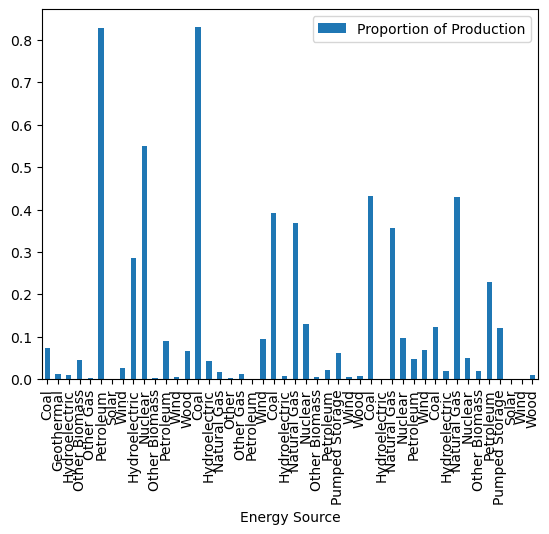

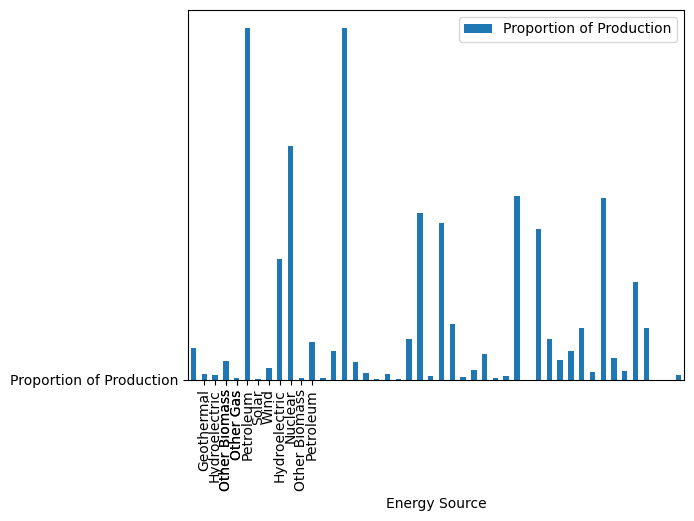

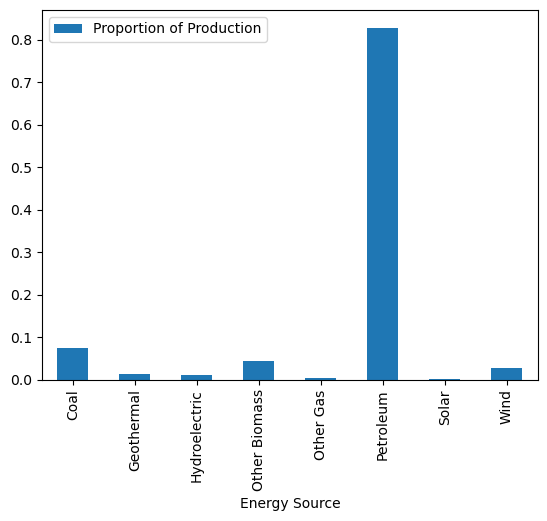

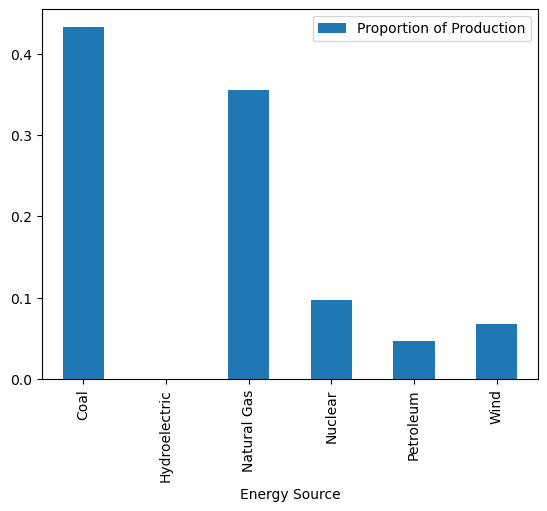

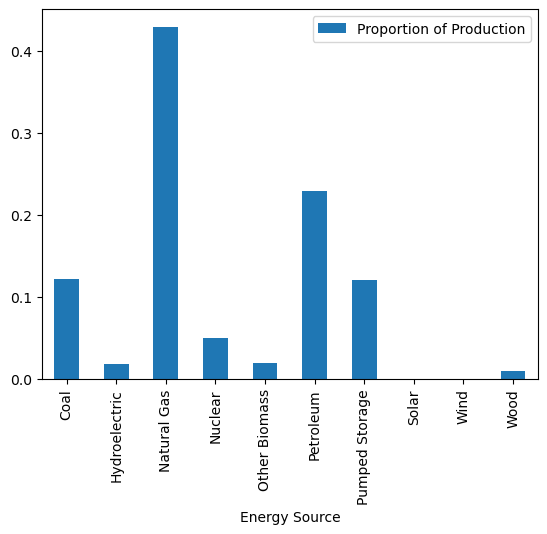

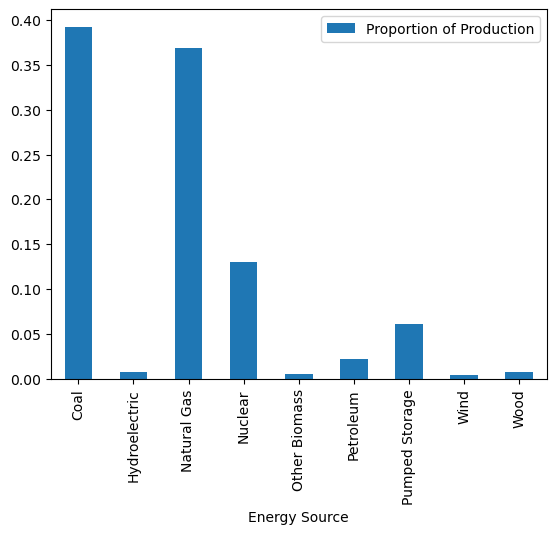

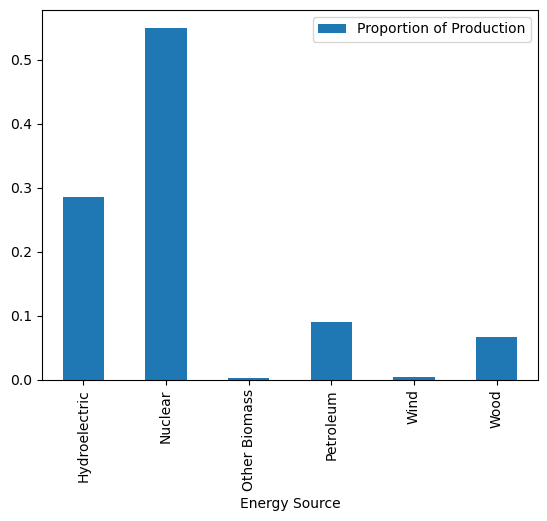

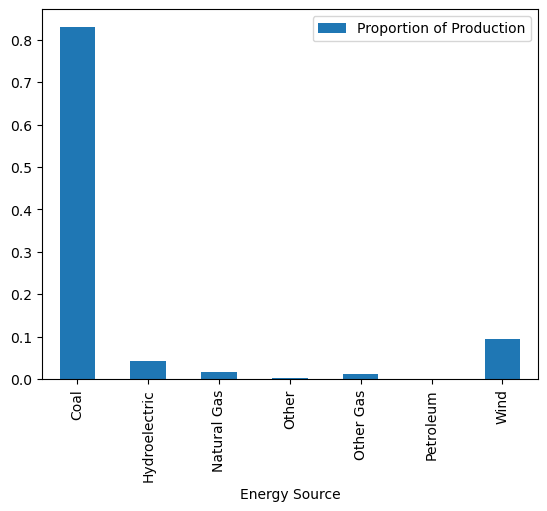

In [110]:
# hawaii_production_capability_2008 = df_2018_filtered_state_no_all.loc[df_2018_filtered_state_no_all['State']=='Hawaii']
# hawaii_production_capability_2008
# vermont_production_capability_2008 = df_agg_production_capability_2008.loc[df_agg_production_capability_2008['State']=='Vermont']
# wyoming_production_capability_2008 = df_agg_production_capability_2008.loc[df_agg_production_capability_2008['State']=='Wyoming']
# micihgan_production_capability_2008 = df_agg_production_capability_2008.loc[df_agg_production_capability_2008['State']=='Michigan']
# kansas_production_capability_2008 = df_agg_production_capability_2008.loc[df_agg_production_capability_2008['State']=='Kansas']
# massachusetts_production_capability_2008 = df_agg_production_capability_2008.loc[df_agg_production_capability_2008['State']=='Massachusetts']

# x_axis = hawaii_production_capability_2008['Energy Source']
# y_axis = hawaii_production_capability_2008['Proportion of Production']

# hawaii_production_capability_2008.plot(x_axis, y_axis, kind='bar')
# plt.show()
df_2008_filtered_state_no_all.groupby('State').plot(kind='bar', x='Energy Source', y='Proportion of Production')
plt.show()
# df_2008_filtered_state_no_all.groupby('State').unstack().plot(x_axis, y_axis, kind='bar')
# plt.show

#x_axis = np.arange(0, len('Energy Source'))


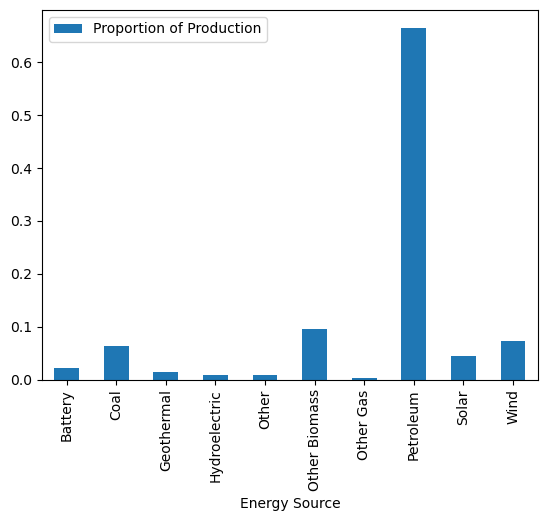

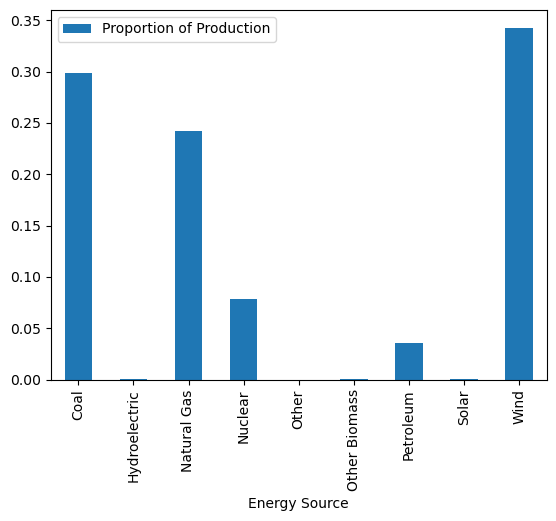

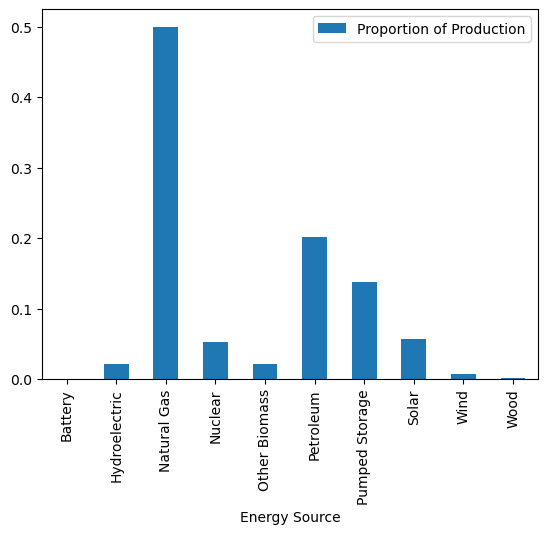

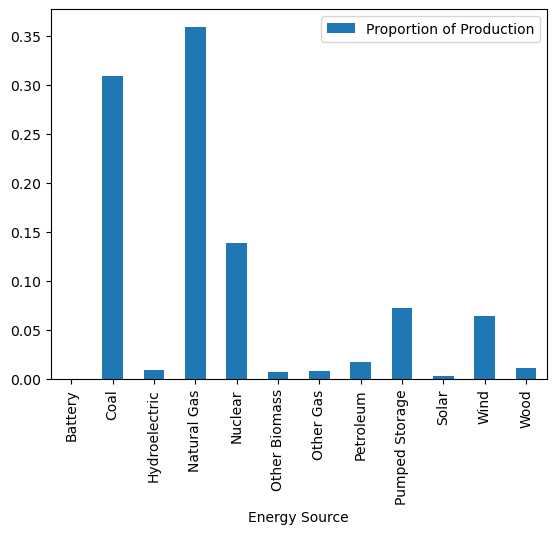

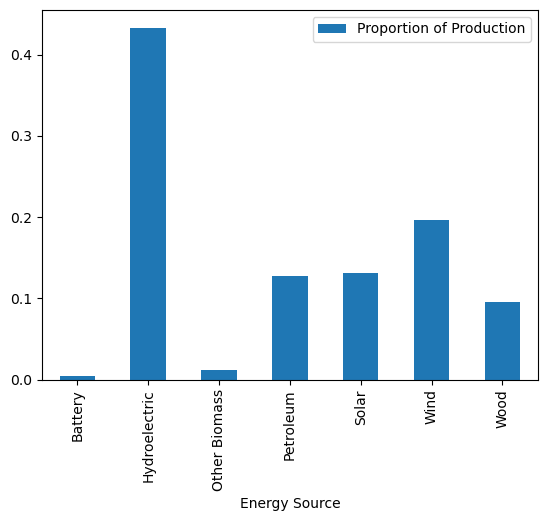

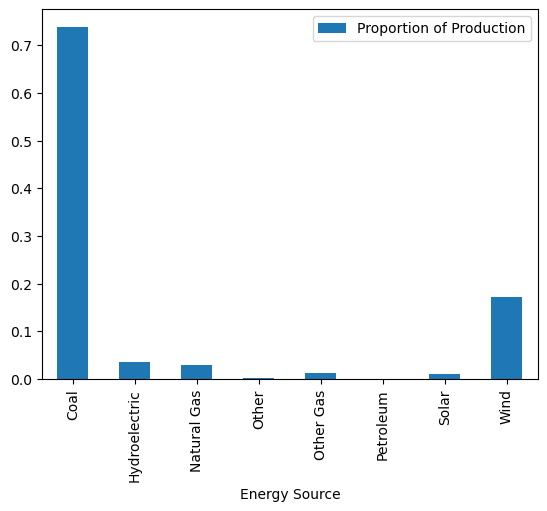

In [112]:
df_2018_filtered_state_no_all.groupby('State').plot(kind='bar', x='Energy Source', y='Proportion of Production')
plt.show()